In [34]:
# 导入需要的包
from tensorflow.keras.models import load_model
from skimage import transform
from skimage import exposure
from skimage import io
import numpy as np
import matplotlib.image as imgplt
import matplotlib.pyplot as plt

# 加载模型
model = load_model('output/testmodel2.pb')

# 加载交通标志名称
labelNames = open("signnames1.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[2] for l in labelNames]
labels=[]

for i in range(1,11):
    imagePath ='C:/Users/Lenovo/Desktop/测试图片/'+str(i)+'.png'
    #加载图片
    image = io.imread(imagePath)
    #采用与训练阶段相同的方法对图片预处理
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)
    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)
    #预测
    preds = model.predict(image)
    j = preds.argmax(axis=1)[0]
    #获得预测类别的具体名称
    label = labelNames[j]
    labels.append(label)

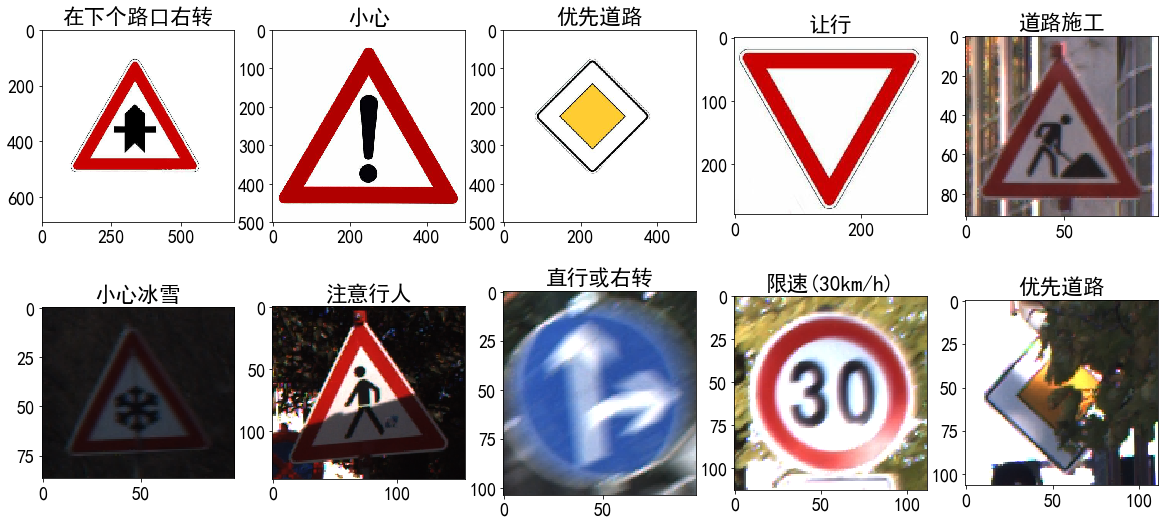

In [35]:
#在jupyter notebook中正常显示中文
plt.rc('font', family='SimHei', size=18)
fig = plt.figure(figsize=(20,9)) 
for i in range(1,11):
    imagePath ='C:/Users/Lenovo/Desktop/测试图片/'+str(i)+'.png'
    x = imgplt.imread(imagePath)
    #显示图片和预测的类别
    plt.subplot(2,5,i)
    plt.imshow(x)
    plt.title(labels[i-1])